In [2]:
import numpy as np 
import pandas as pd 

In [3]:
data = pd.read_csv('AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
# Temel istatistikler
print(data.describe())

         Unnamed: 0            id    size_bytes        price  \
count   7197.000000  7.197000e+03  7.197000e+03  7197.000000   
mean    4759.069612  8.631310e+08  1.991345e+08     1.726218   
std     3093.625213  2.712368e+08  3.592069e+08     5.833006   
min        1.000000  2.816565e+08  5.898240e+05     0.000000   
25%     2090.000000  6.000937e+08  4.692275e+07     0.000000   
50%     4380.000000  9.781482e+08  9.715302e+07     0.000000   
75%     7223.000000  1.082310e+09  1.819249e+08     1.990000   
max    11097.000000  1.188376e+09  4.025970e+09   299.990000   

       rating_count_tot  rating_count_ver  user_rating  user_rating_ver  \
count      7.197000e+03       7197.000000  7197.000000      7197.000000   
mean       1.289291e+04        460.373906     3.526956         3.253578   
std        7.573941e+04       3920.455183     1.517948         1.809363   
min        0.000000e+00          0.000000     0.000000         0.000000   
25%        2.800000e+01          1.000000     3.

In [5]:
# Ücretli ve ücretsiz uygulamaları ayır
paid_apps = data[data['price'] > 0]
free_apps = data[data['price'] == 0]

# Ortalama kullanıcı puanlarını hesapla
paid_avg_rating = paid_apps['user_rating'].mean()
free_avg_rating = free_apps['user_rating'].mean()

print(f"Ücretli uygulamaların ortalama kullanıcı puanı: {paid_avg_rating}")
print(f"Ücretsiz uygulamaların ortalama kullanıcı puanı: {free_avg_rating}")


Ücretli uygulamaların ortalama kullanıcı puanı: 3.720948742438714
Ücretsiz uygulamaların ortalama kullanıcı puanı: 3.3767258382642997


In [6]:
# Her tür için ortalama kullanıcı puanını hesapla
genre_avg_ratings = data.groupby('prime_genre')['user_rating'].mean().sort_values(ascending=False)

print(genre_avg_ratings)


prime_genre
Productivity         4.005618
Music                3.978261
Photo & Video        3.800860
Business             3.745614
Health & Fitness     3.700000
Games                3.685008
Weather              3.597222
Shopping             3.540984
Reference            3.453125
Travel               3.376543
Education            3.376380
Medical              3.369565
Utilities            3.278226
Entertainment        3.246729
Food & Drink         3.182540
Social Networking    2.985030
Sports               2.982456
News                 2.980000
Lifestyle            2.805556
Navigation           2.684783
Book                 2.477679
Finance              2.432692
Catalogs             2.100000
Name: user_rating, dtype: float64


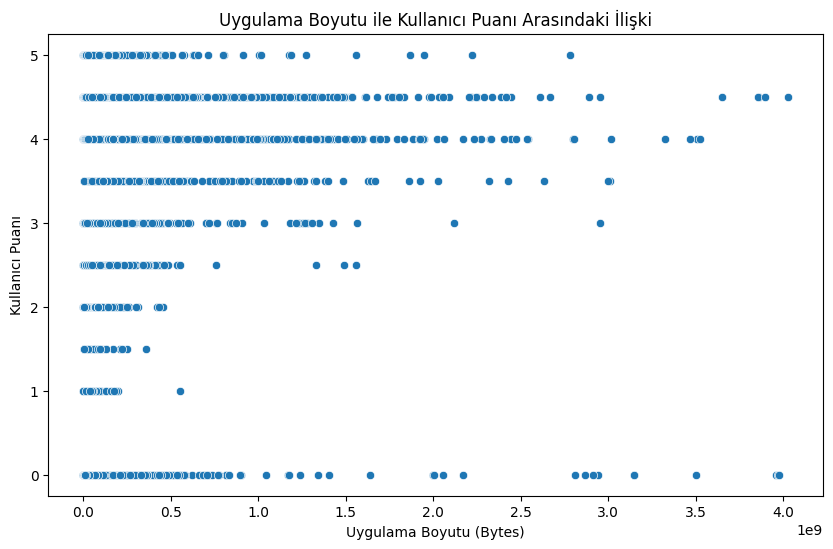

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Uygulama boyutu ve kullanıcı puanları arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size_bytes', y='user_rating', data=data)
plt.xlabel('Uygulama Boyutu (Bytes)')
plt.ylabel('Kullanıcı Puanı')
plt.title('Uygulama Boyutu ile Kullanıcı Puanı Arasındaki İlişki')
plt.show()


In [8]:
# En çok değerlendirme alan 10 uygulama
top_rated_apps = data.sort_values(by='rating_count_tot', ascending=False).head(10)

print(top_rated_apps[['track_name', 'rating_count_tot', 'user_rating']])


                   track_name  rating_count_tot  user_rating
16                   Facebook           2974676          3.5
519                 Instagram           2161558          4.5
1346           Clash of Clans           2130805          4.5
707                Temple Run           1724546          4.5
7     Pandora - Music & Radio           1126879          4.0
755                 Pinterest           1061624          4.5
4                       Bible            985920          4.5
1493         Candy Crush Saga            961794          4.5
178             Spotify Music            878563          4.5
275               Angry Birds            824451          4.5


In [9]:
# En yüksek kullanıcı puanına sahip 10 uygulama
highest_rated_apps = data.sort_values(by='user_rating', ascending=False).head(10)

print(highest_rated_apps[['track_name', 'user_rating', 'rating_count_tot']])


                                             track_name  user_rating  \
7196                       Escape the Sweet Shop Series          5.0   
6231                           激おこ!! はじめしゃちょー　なんなんですか!?          5.0   
2531                                         Mini Metro          5.0   
2530  Wayfair - Shop Furniture, Home Decor, Daily Sales          5.0   
4885  Mystic Castle - the Simplest & Best RPG and Ad...          5.0   
843                CCW – Concealed Carry 50 State Guide          5.0   
6253  PS Deals+ - Games Price Alerts for PS4, PS3, Vita          5.0   
850                                驴妈妈旅游-订景点门票机票火车票特价酒店          5.0   
3672            Productive habits & daily goals tracker          5.0   
855                               Daily Audio Bible App          5.0   

      rating_count_tot  
7196                 3  
6231                 1  
2531              4064  
2530             12578  
4885               650  
843                644  
6253                28  
850    

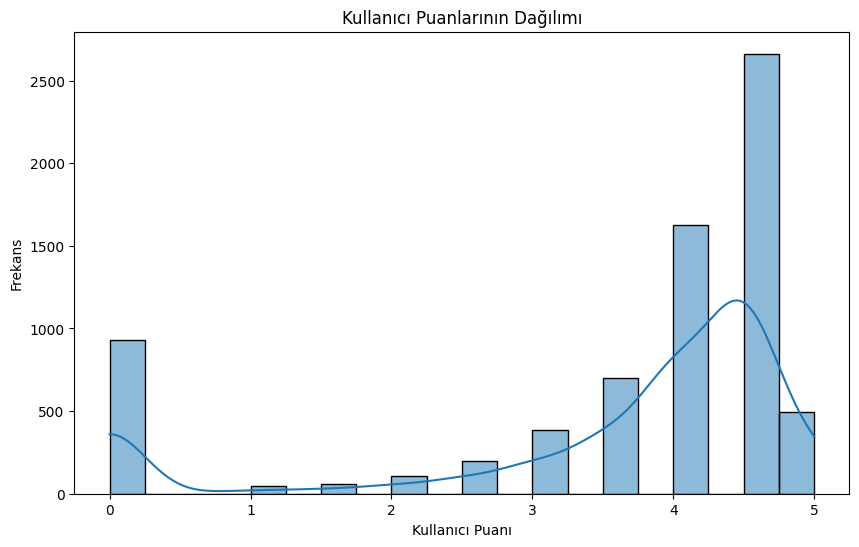

In [10]:
# Kullanıcı puanlarının dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(data['user_rating'], bins=20, kde=True)
plt.xlabel('Kullanıcı Puanı')
plt.ylabel('Frekans')
plt.title('Kullanıcı Puanlarının Dağılımı')
plt.show()


In [11]:
# En fazla dil desteğine sahip 10 uygulama
most_languages_apps = data.sort_values(by='lang.num', ascending=False).head(10)

print(most_languages_apps[['track_name', 'lang.num']])


                                             track_name  lang.num
3414  Google Photos - unlimited photo and video storage        75
5780                  Google Duo - simple video calling        74
2676                                      Google Slides        69
2550                                        Google Docs        69
2551                                      Google Sheets        69
5777                      Google Allo — smart messaging        68
2863                                     Inbox by Gmail        63
681                                    Google Translate        59
6392                                   Space by Tinybop        58
3141                       The Robot Factory by Tinybop        58


In [12]:
# En fazla cihaz desteğine sahip 10 uygulama
most_devices_apps = data.sort_values(by='sup_devices.num', ascending=False).head(10)

print(most_devices_apps[['track_name', 'sup_devices.num']])


                             track_name  sup_devices.num
613                         Bloons TD 4               47
423        Crash Bandicoot Nitro Kart 2               47
19        Crash Bandicoot Nitro Kart 3D               47
173           Resident Evil 4: PLATINUM               47
176                       Moto X Mayhem               47
254               Call of Duty: Zombies               47
253                      Jet Car Stunts               47
868  Virtual Villagers 5: New Believers               47
61                          Fish Tycoon               47
163                    Virtual Families               47


In [13]:
# En fazla cihaz desteğine sahip 10 uygulama
most_devices_apps = data.sort_values(by='sup_devices.num', ascending=False).head(10)

print(most_devices_apps[['track_name', 'sup_devices.num']])


                             track_name  sup_devices.num
613                         Bloons TD 4               47
423        Crash Bandicoot Nitro Kart 2               47
19        Crash Bandicoot Nitro Kart 3D               47
173           Resident Evil 4: PLATINUM               47
176                       Moto X Mayhem               47
254               Call of Duty: Zombies               47
253                      Jet Car Stunts               47
868  Virtual Villagers 5: New Believers               47
61                          Fish Tycoon               47
163                    Virtual Families               47


In [14]:
# Ücretli ve ücretsiz uygulamaların karşılaştırılması
paid_apps_stats = paid_apps.describe()
free_apps_stats = free_apps.describe()

print("Ücretli Uygulamalar İstatistikleri:\n", paid_apps_stats)
print("\nÜcretsiz Uygulamalar İstatistikleri:\n", free_apps_stats)


Ücretli Uygulamalar İstatistikleri:
          Unnamed: 0            id    size_bytes        price  \
count   3141.000000  3.141000e+03  3.141000e+03  3141.000000   
mean    4238.946195  8.166003e+08  2.652478e+08     3.955298   
std     3042.399929  2.802664e+08  4.812326e+08     8.315882   
min        1.000000  2.816565e+08  5.898240e+05     0.990000   
25%     1671.000000  5.456238e+08  3.694285e+07     1.990000   
50%     3611.000000  9.221999e+08  9.229107e+07     2.990000   
75%     6461.000000  1.067146e+09  2.335140e+08     4.990000   
max    11087.000000  1.187780e+09  4.025970e+09   299.990000   

       rating_count_tot  rating_count_ver  user_rating  user_rating_ver  \
count       3141.000000       3141.000000  3141.000000      3141.000000   
mean        4038.537090        319.586437     3.720949         3.503661   
std        25869.299527       3621.501219     1.311471         1.622219   
min            0.000000          0.000000     0.000000         0.000000   
25%        

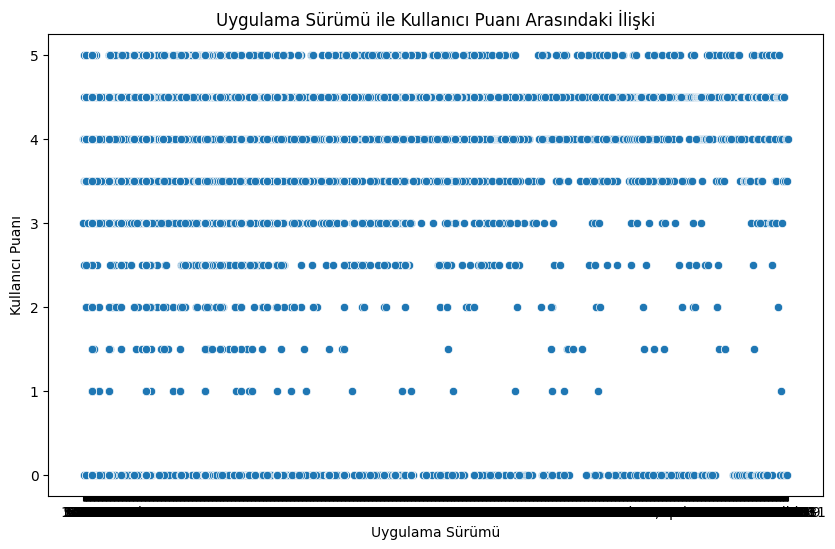

In [15]:
# Uygulama sürümleri ve kullanıcı puanları arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ver', y='user_rating', data=data)
plt.xlabel('Uygulama Sürümü')
plt.ylabel('Kullanıcı Puanı')
plt.title('Uygulama Sürümü ile Kullanıcı Puanı Arasındaki İlişki')
plt.show()


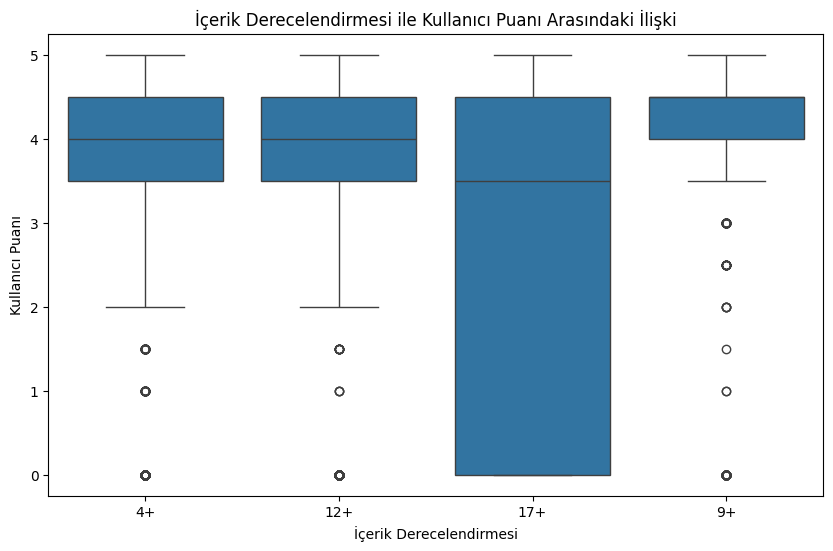

In [16]:
# İçerik derecelendirmesi ve kullanıcı puanları arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.boxplot(x='cont_rating', y='user_rating', data=data)
plt.xlabel('İçerik Derecelendirmesi')
plt.ylabel('Kullanıcı Puanı')
plt.title('İçerik Derecelendirmesi ile Kullanıcı Puanı Arasındaki İlişki')
plt.show()


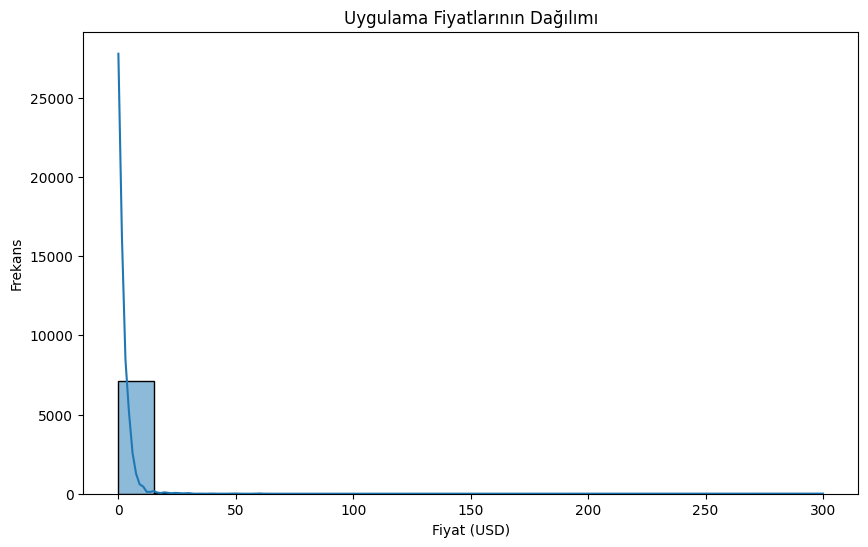

In [17]:
# Fiyat dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.xlabel('Fiyat (USD)')
plt.ylabel('Frekans')
plt.title('Uygulama Fiyatlarının Dağılımı')
plt.show()


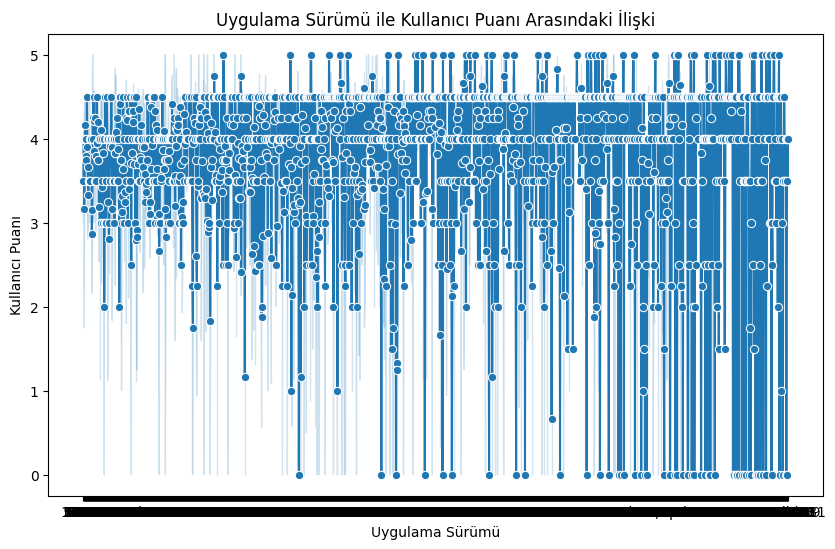

In [18]:
# Uygulama sürümlerinin kullanıcı puanlarına etkisi
plt.figure(figsize=(10, 6))
sns.lineplot(x='ver', y='user_rating', data=data, marker='o')
plt.xlabel('Uygulama Sürümü')
plt.ylabel('Kullanıcı Puanı')
plt.title('Uygulama Sürümü ile Kullanıcı Puanı Arasındaki İlişki')
plt.show()


In [19]:
# Uygulama sürümü ile en çok güncellenen uygulamalar
most_updated_apps = data.groupby('track_name').count().sort_values(by='ver', ascending=False).head(10)

print(most_updated_apps[['ver']])


                                                   ver
track_name                                            
VR Roller Coaster                                    2
Mannequin Challenge                                  2
! OH Fantastic Free Kick + Kick Wall Challenge       1
Southwest Airlines                                   1
Soundtrack Attack - Steven Universe Rhythm Runner    1
Sounds app - Music And Friends                       1
SoundHound Song Search & Music Player                1
SoundCloud Pulse: for creators                       1
SoundCloud - Music & Audio                           1
SoundBow                                             1


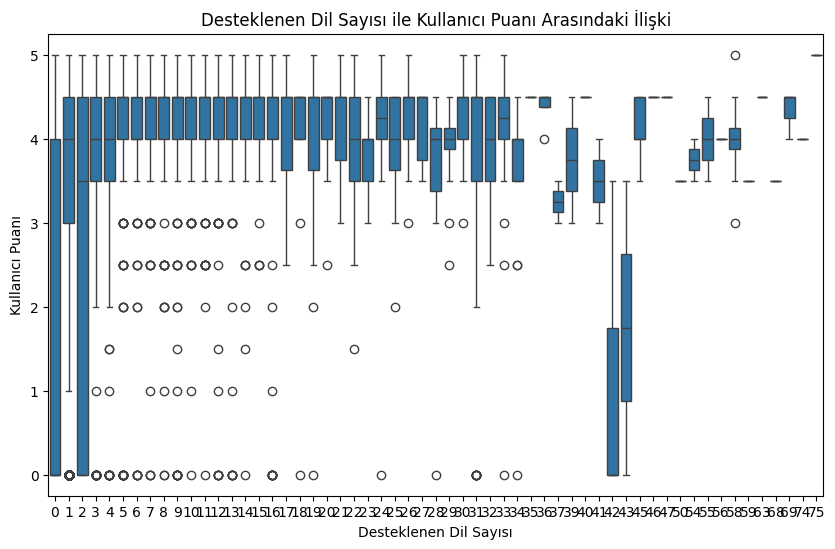

In [20]:
# Farklı dillerde destek veren uygulamaların kullanıcı puanları
plt.figure(figsize=(10, 6))
sns.boxplot(x='lang.num', y='user_rating', data=data)
plt.xlabel('Desteklenen Dil Sayısı')
plt.ylabel('Kullanıcı Puanı')
plt.title('Desteklenen Dil Sayısı ile Kullanıcı Puanı Arasındaki İlişki')
plt.show()


In [21]:
# Uygulama türlerinin toplam gelir getirisi
data['total_revenue'] = data['price'] * data['rating_count_tot']

genre_revenue = data.groupby('prime_genre')['total_revenue'].sum().sort_values(ascending=False)

print(genre_revenue)


prime_genre
Games                26210820.32
Productivity          1780758.05
Music                 1293572.97
Photo & Video         1121039.86
Education              922053.85
Health & Fitness       906875.05
Entertainment          739470.51
Business               733893.35
Utilities              533624.73
Weather                495965.15
Reference              366515.64
News                   186763.48
Navigation             175591.59
Lifestyle              133064.67
Medical                129859.44
Book                    90395.41
Travel                  57228.12
Food & Drink            47628.68
Finance                 40822.14
Social Networking       39196.66
Sports                  29413.19
Catalogs                10458.91
Shopping                 5416.78
Name: total_revenue, dtype: float64


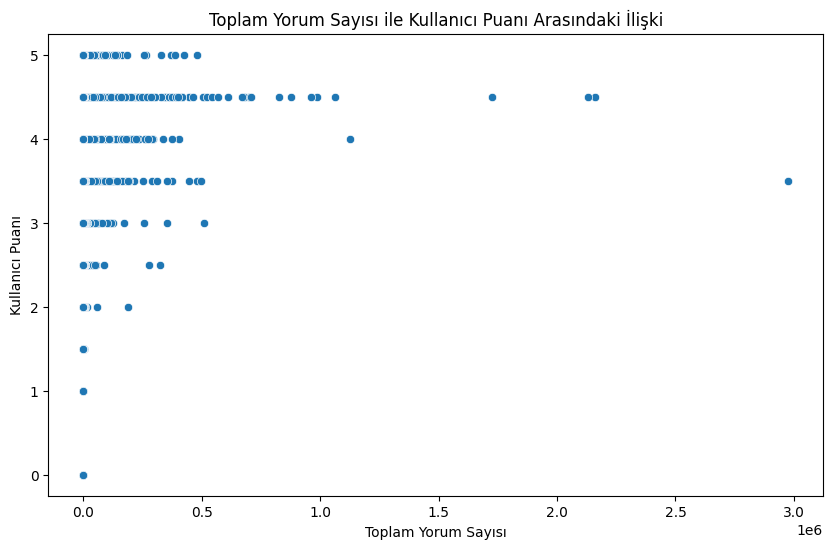

In [22]:
# Toplam yorum sayısı ile kullanıcı puanları arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_count_tot', y='user_rating', data=data)
plt.xlabel('Toplam Yorum Sayısı')
plt.ylabel('Kullanıcı Puanı')
plt.title('Toplam Yorum Sayısı ile Kullanıcı Puanı Arasındaki İlişki')
plt.show()


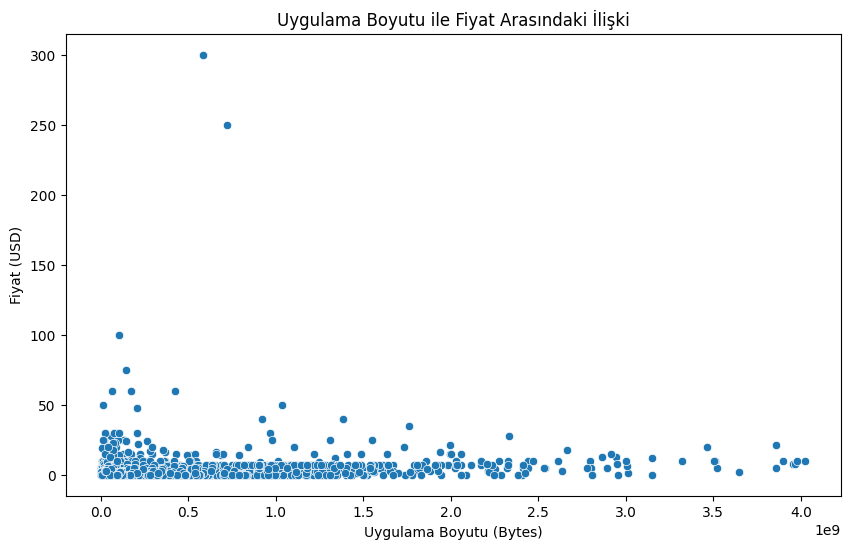

In [23]:
# Uygulama boyutu ile fiyat arasındaki ilişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size_bytes', y='price', data=data)
plt.xlabel('Uygulama Boyutu (Bytes)')
plt.ylabel('Fiyat (USD)')
plt.title('Uygulama Boyutu ile Fiyat Arasındaki İlişki')
plt.show()


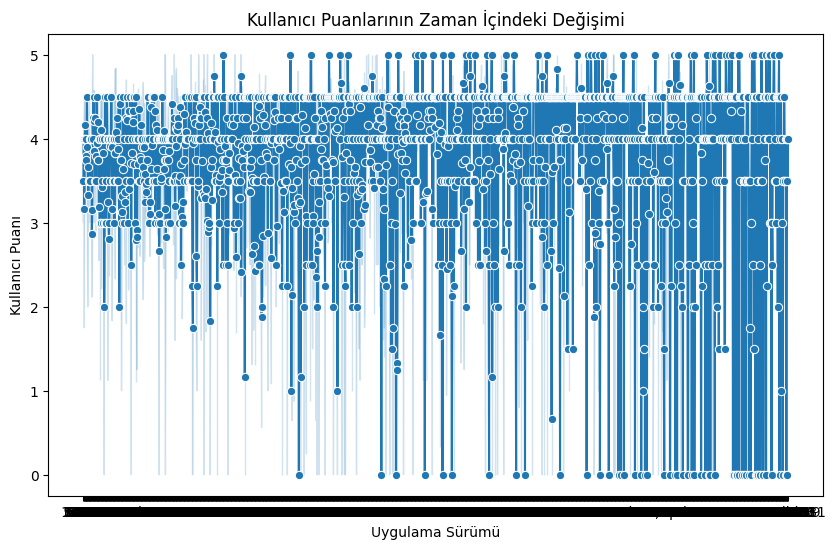

In [24]:
# Kullanıcı puanlarının zaman içindeki değişimi
plt.figure(figsize=(10, 6))
sns.lineplot(x='ver', y='user_rating', data=data, marker='o')
plt.xlabel('Uygulama Sürümü')
plt.ylabel('Kullanıcı Puanı')
plt.title('Kullanıcı Puanlarının Zaman İçindeki Değişimi')
plt.show()


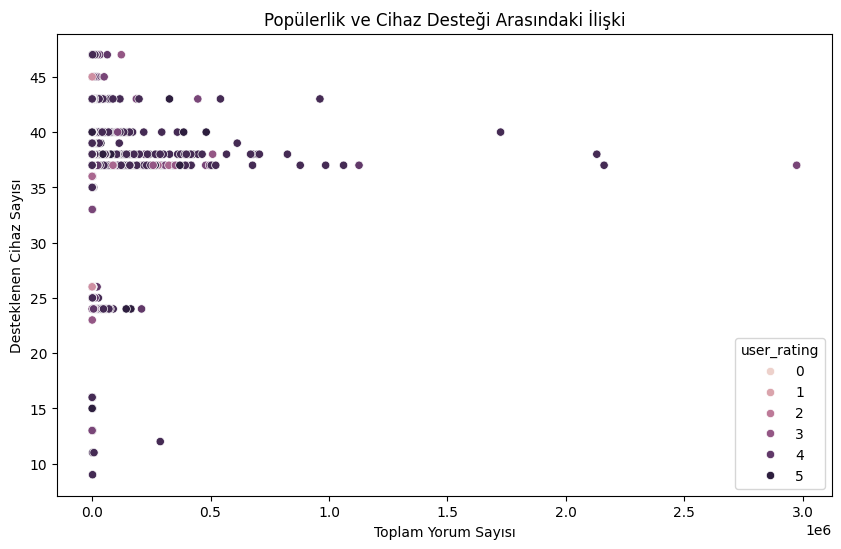

In [25]:
# Popülerlik ve cihaz desteği
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_count_tot', y='sup_devices.num', hue='user_rating', data=data)
plt.xlabel('Toplam Yorum Sayısı')
plt.ylabel('Desteklenen Cihaz Sayısı')
plt.title('Popülerlik ve Cihaz Desteği Arasındaki İlişki')
plt.show()


In [26]:
# Ücretli ve ücretsiz uygulamaların ortalama boyutu
paid_avg_size = paid_apps['size_bytes'].mean()
free_avg_size = free_apps['size_bytes'].mean()

print(f"Ücretli uygulamaların ortalama boyutu: {paid_avg_size / 1024**2:.2f} MB")
print(f"Ücretsiz uygulamaların ortalama boyutu: {free_avg_size / 1024**2:.2f} MB")


Ücretli uygulamaların ortalama boyutu: 252.96 MB
Ücretsiz uygulamaların ortalama boyutu: 141.08 MB


In [27]:
# En yüksek ve en düşük puanlı uygulamaları ayır
highest_rated = data[data['user_rating'] == data['user_rating'].max()]
lowest_rated = data[data['user_rating'] == data['user_rating'].min()]

print("En yüksek puanlı uygulamalar:\n", highest_rated)
print("En düşük puanlı uygulamalar:\n", lowest_rated)


En yüksek puanlı uygulamalar:
       Unnamed: 0          id  \
21            23   285994151   
230          262   335545504   
271          305   342548956   
302          341   350642635   
318          357   353372460   
...          ...         ...   
7166       10990  1181904201   
7170       11010  1183234072   
7171       11013  1183260922   
7180       11036  1185365336   
7196       11097  1188375727   

                                             track_name  size_bytes currency  \
21                                          :) Sudoku +     6169600      USD   
230                                 King of Dragon Pass   364490752      USD   
271   TurboScan™ Pro - document & receipt scanner: s...     8821760      USD   
302                                  Plants vs. Zombies   105379840      USD   
318         Learn to Speak Spanish Fast With MosaLingua    48819200      USD   
...                                                 ...         ...      ...   
7166   4x4 Dirt Track Tr